<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<b>Укажем описание признаков:</b>

<b>Признаки</b>
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

<b>Целевой признак</b>
- Exited — факт ухода клиента

## Подготовка данных

In [114]:
#подключим необходимые для работы библиотеки

import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
pd.options.display.float_format = '{:,.3f}'.format

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
#прочитаем исходный датафрейм

try:
    data = pd.read_csv('C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/Churn.csv', sep=',') 
    
except:
    data = pd.read_csv('/datasets/Churn.csv', sep=',')

In [3]:
# изучим основную информацию о датафрейме

print('Первые 10 строк датафрейма:')
display(data.head(10))
print('Основная информация о датафрейме:')
display(data.info())
print('Размер датасета:')
display(data.shape)
print('Доля пропущенных данных в датафрейме:')
display(data.isna().mean())
print('Количество дубликатов: ')
display(data.duplicated().sum())

Первые 10 строк датафрейма:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0
5,6,15574012,Chu,645,Spain,Male,44,8.00,"113,755.78",2,1,0,"149,756.71",1
6,7,15592531,Bartlett,822,France,Male,50,7.00,0.00,2,1,1,"10,062.80",0
7,8,15656148,Obinna,376,Germany,Female,29,4.00,"115,046.74",4,1,0,"119,346.88",1
8,9,15792365,He,501,France,Male,44,4.00,"142,051.07",2,0,1,"74,940.50",0
9,10,15592389,H?,684,France,Male,27,2.00,"134,603.88",1,1,1,"71,725.73",0


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

Размер датасета:


(10000, 14)

Доля пропущенных данных в датафрейме:


RowNumber         0.00
CustomerId        0.00
Surname           0.00
CreditScore       0.00
Geography         0.00
Gender            0.00
Age               0.00
Tenure            0.09
Balance           0.00
NumOfProducts     0.00
HasCrCard         0.00
IsActiveMember    0.00
EstimatedSalary   0.00
Exited            0.00
dtype: float64

Количество дубликатов: 


0

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Изучив исходные данные датафрейма можно сказать, что данные представлены практически в полном объеме, за исключением столбца 'Tenure', типы данных корректны, кроме столбца 'Tenure'. Также в представленном датафрейме уже имеется целевой признак - "Exited".
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Заполним пропущенные значения столбца 'Tenure' медианным зчанением и изменим тип данных по данному столбцу.
</div>

In [4]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype(int)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Также из исходного датафрейма удалим ряд стоблцов, которые не нужны при обучении модели. 
</div>

In [5]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Перейдем к подготовке признаков. Техникой ОНЕ преобразуем категориальные признаки в численные.
</div>

In [6]:
data = pd.get_dummies(data, drop_first=True)

data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,0,0,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,"96,270.64",0,0,0,1
9996,516,35,10,"57,369.61",1,1,1,"101,699.77",0,0,0,1
9997,709,36,7,0.00,1,0,1,"42,085.58",1,0,0,0
9998,772,42,3,"75,075.31",2,1,0,"92,888.52",1,1,0,1


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Далее нам необходимо разделить выборку на обучающую, валидационную и тестовую.
Т.к. у нас нет спрятанной тестовой выборки поделим исходные данные на три части. Сделаем размеры валидационного и тестового наборов одинаковыми, а общее соотношение обучающего, валидационного и тестового наборов примем 3:1:1 соответственно, т.е. 60%:20%:20%. 
</div>


In [7]:
#для начала отделим обучающую выборку от валидационной и тестовой

target = data['Exited']
features = data.drop('Exited', axis=1)

features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)

#далее отделим тестовую выборку от валидационной

features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5,
                                                                              random_state=12345)

#далее узнаем размеры выборок

print('Размер обучающей выборки равен: ', features_train.shape)
print('Размер валидационной выборки равен: ', features_valid.shape)
print('Размер тестовой выборки равен: ', features_test.shape)

Размер обучающей выборки равен:  (2000, 11)
Размер валидационной выборки равен:  (6000, 11)
Размер тестовой выборки равен:  (2000, 11)


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Теперь проведем масштабирование количественных признаков с помощью их стандартизации.
</div>

In [8]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]= scaler.transform(features_valid[numeric]) 
features_test[numeric]= scaler.transform(features_test[numeric]) 

features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.89,-0.37,1.08,1.23,-0.89,1,0,-0.19,0,1,1
3411,0.61,-0.18,1.08,0.60,-0.89,0,0,-0.33,0,0,0
6027,2.05,0.48,-0.74,1.03,0.83,0,1,1.50,1,0,1
1247,-1.46,-1.42,0.35,-1.23,0.83,1,0,-1.07,0,0,1
3716,0.13,-1.13,-1.10,1.14,-0.89,0,0,1.52,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.07,-0.75,-0.37,-1.23,0.83,0,1,-1.28,0,0,1
4094,-1.45,-0.94,1.81,-1.23,0.83,0,1,-1.28,0,0,1
3492,0.03,0.58,-0.01,-0.31,-0.89,0,1,-0.90,0,0,0
2177,0.15,-1.42,-0.37,-1.23,0.83,0,1,-1.13,0,0,0


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Данные и признаки подготовлены. Можно переходить к исследованию задачи.
</div>

## Исследование задачи

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Для начала исследуем баланс классов.
</div>

In [9]:
#изучим количество значений каждого класса

print(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Как можно заметить исходные данные несбалансированы. Значений класса "0" практически в четыре раза больше значений класса "1". Для начала исследуем модели без работы над дисбалансом классов. Будем исследовать модели "Дерево решений", "Случайный лес" и "Логистическая регрессия".
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Сначала происследуем данные на модели "Дерево решений". Для подбора оптимальных гиперпараметров используем функцию GridsearchCV. 
</div>

In [10]:
#зададим гиперпараметры дерева решений

max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

max_features = [int(x) for x in np.linspace(1, 20, num = 10)]

random_state=[12345]

dt_grid = {'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'max_features': max_features,
           'random_state': random_state}

model_dt = GridSearchCV(DecisionTreeClassifier(), dt_grid, scoring = 'accuracy')
# обучаем модель
model_dt.fit(features_train,target_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [12345]},
             scoring='accuracy')

In [11]:
#определяем лучшие гиперпараметры для дерева решений

print('Наивысшая оценка: %s' % model_dt.best_score_)
print('Лучшие гиперпараметры: %s' % model_dt.best_params_)

Наивысшая оценка: 0.8616666666666666
Лучшие гиперпараметры: {'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 12345}


In [12]:
#получаем предсказания для валидационной выборки

predicted_valid_dt = model_dt.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_dt))
print('Точность:', precision_score(target_valid, predicted_valid_dt))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_dt))

Полнота: 0.39473684210526316
Точность: 0.7971014492753623
F1-score: 0.5279999999999999


In [13]:
#определим AUC-ROC для модели дерева решений

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_dt.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.864
AUC-ROC на валидационной выборке: 0.838


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Нами были определены оптимальные гиперпараметры с помощью функцию GridsearchCV. Можно заметить, что такой показатель как "полнота" имеет достаточно низкое значение, при этом показатель "точность" находится на достаточно высоком уровне. То есть модель не очень хорошо ищет положительные объекты, при этом модель достаточно точно присваивает положительные метки. У данной модели достаточно высокое значение AUC-ROC на валидационной выборке. Также не особо высоокое значение у F1-меры. Модель в данном случае будет успешно предсказывать класса "1" лишь в 52% случаев. Мы имеем дело с несбалансированными данными, возможно данный факт вносит свои коррективы.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Перейдем к модели "Случайный лес". Для подбора оптимальных гиперпараметров используем функцию GridsearchCV. 
</div>

In [14]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 11)]

max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_state=[12345]

rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'random_state': random_state}


model_rf = GridSearchCV(RandomForestClassifier(), rf_grid, scoring = 'accuracy')
# обучаем модель
model_rf.fit(features_train,target_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 19, 28, 37, 46, 55, 64, 73, 82,
                                          91, 100],
                         'random_state': [12345]},
             scoring='accuracy')

In [15]:
print('Наивысшая оценка: %s' % model_rf.best_score_)
print('Лучшие гиперпараметры: %s' % model_rf.best_params_)

Наивысшая оценка: 0.8681666666666666
Лучшие гиперпараметры: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 73, 'random_state': 12345}


In [16]:
#получаем предсказания для валидационной выборки

predicted_valid_rf = model_rf.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_rf))
print('Точность:', precision_score(target_valid, predicted_valid_rf))

#также определяем значение f1 меры

print('F1-score', f1_score(target_valid, predicted_valid_rf))

Полнота: 0.4473684210526316
Точность: 0.8237885462555066
F1-score 0.57984496124031


In [17]:
#определим AUC-ROC для модели случайного леса

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_rf.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.935
AUC-ROC на валидационной выборке: 0.852


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Как можно заметить по показателям выше, модель "Случайного леса" показывет результаты лушче, чем "Дерево решений", F1-мера незначительно, но выше, как и значение AUC-ROC.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Перейдем к модели "Логистическая регрессия". Для подбора оптимальных гиперпараметров используем функцию GridsearchCV. 
</div>

In [18]:
C = [int(x) for x in np.linspace(start = 1, stop = 10, num = 11)]

max_iter = [int(x) for x in np.linspace(1, 150, num = 11)]

penalty = ['l1', 'l2', 'elasticnet', 'none']

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

random_state=[12345]

lr_grid = {'C': C,
           'max_iter': max_iter,
           'penalty': penalty,
           'solver': solver,
           'random_state': random_state}


model_lr = GridSearchCV(LogisticRegression(), lr_grid, scoring = 'accuracy')
# обучаем модель
model_lr.fit(features_train,target_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_iter': [1, 15, 30, 45, 60, 75, 90, 105, 120, 135,
                                      150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [12345],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [19]:
#получаем предсказания для валидационной выборки

predicted_valid_lr = model_lr.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_lr))
print('Точность:', precision_score(target_valid, predicted_valid_lr))

#также определяем значение f1 меры

print('F1-score', f1_score(target_valid, predicted_valid_lr))

Полнота: 0.23205741626794257
Точность: 0.563953488372093
F1-score 0.3288135593220339


In [20]:
print('Наивысшая оценка: %s' % model_lr.best_score_)
print('Лучшие гиперпараметры: %s' % model_lr.best_params_)

Наивысшая оценка: 0.8173333333333334
Лучшие гиперпараметры: {'C': 1, 'max_iter': 15, 'penalty': 'l1', 'random_state': 12345, 'solver': 'saga'}


In [21]:
#определим AUC-ROC для модели логистической регрессии

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_lr.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.777
AUC-ROC на валидационной выборке: 0.759


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
У "Логистической регрессии" довольно слабые результаты. Скорее всего данные были больше подготовлены под древовидные алгоритмы.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Визуально отобразим наши ROC-кривые (кривые ошибок) по каждой модели.
</div>

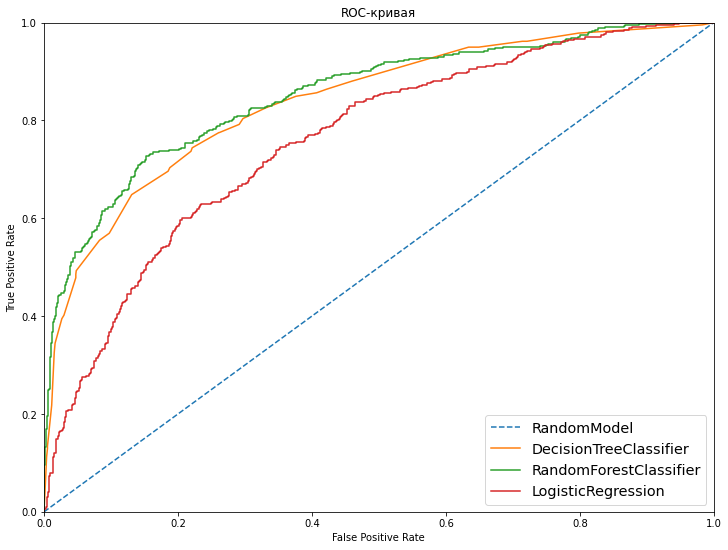

In [22]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

fpr, tpr, thresholds = roc_curve(target_valid, model_dt.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_rf.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='RandomForestClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_lr.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='LogisticRegression')

plt.legend(loc='lower right', fontsize='x-large')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В заключение можно сказать, что при дисбалансе классов наибольшие значения метрик F1-меры и AUC-ROC показывает модель случайного леса с F1-мерой равной 0.579 и AUC-ROC равной 0.852. Также неплохие значения метрик имеет модель дерева решений, на последнем месте по данным метрикам идет модель логистической регрессии. Возможно, влияет сильный дисбаланс классов и подготовка данных под древовидные алгоритмы. Далее изучим модели уже с учетом борьбы с дисбалансом классов и проверим так ли это)
</div>

## Борьба с дисбалансом

### Взвешивание классов

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Одним из методов борьбы с дисбалансом является взвешивание классов. Происследуем наши модели с учетом весов каждого класса. Начнем с модели "Дерево решений".
</div>

In [72]:
#изучим соотношение классов в тренировочной выборке

print(target_train.value_counts())

0    4804
1    1196
Name: Exited, dtype: int64


In [27]:
#зададим гиперпараметры дерева решений

max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

max_features = [int(x) for x in np.linspace(1, 20, num = 10)]

random_state=[12345]

class_weight = ['balanced']

dt_grid = {'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'max_features': max_features,
           'random_state': random_state,
           'class_weight': class_weight}

model_dt_balance = GridSearchCV(DecisionTreeClassifier(), dt_grid, scoring = 'accuracy')
# обучаем модель
model_dt_balance.fit(features_train,target_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [12345]},
             scoring='accuracy')

In [28]:
#определяем лучшие гиперпараметры для дерева решений

print('Наивысшая оценка: %s' % model_dt_balance.best_score_)
print('Лучшие гиперпараметры: %s' % model_dt_balance.best_params_)

Наивысшая оценка: 0.8245000000000001
Лучшие гиперпараметры: {'class_weight': 'balanced', 'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 12345}


In [31]:
#получаем предсказания для валидационной выборки

predicted_valid_dt_balance = model_dt_balance.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_dt_balance))
print('Точность:', precision_score(target_valid, predicted_valid_dt_balance))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_dt_balance))

Полнота: 0.145933014354067
Точность: 0.8356164383561644
F1-score: 0.2484725050916497


In [32]:
#определим AUC-ROC для модели дерева решений

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_dt_balance.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.567
AUC-ROC на валидационной выборке: 0.569


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Как можно заметить, результаты модели дерева решений со взвешиванием классов получились хуже, чем без взвешивания. Мертики F1-мера и AUC-ROC значительно снизились. Перейдем к рассмотрению модели "Случайного леса".
</div>

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 11)]

max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_state=[12345]

class_weight = ['balanced']

rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'random_state': random_state,
           'class_weight': class_weight}


model_rf_balance = GridSearchCV(RandomForestClassifier(), rf_grid, scoring = 'accuracy')
# обучаем модель
model_rf_balance.fit(features_train,target_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 29, 48, 67, 86, 105, 124, 143,
                                          162, 181, 200],
                         'random_state': [12345]},
             scoring='accuracy')

In [44]:
print('Наивысшая оценка: %s' % model_rf_balance.best_score_)
print('Лучшие гиперпараметры: %s' % model_rf_balance.best_params_)

Наивысшая оценка: 0.8535
Лучшие гиперпараметры: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 162, 'random_state': 12345}


In [45]:
#получаем предсказания для валидационной выборки

predicted_valid_rf_balance = model_rf_balance.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_rf_balance))
print('Точность:', precision_score(target_valid, predicted_valid_rf_balance))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_rf_balance))

Полнота: 0.6172248803827751
Точность: 0.6246973365617433
F1-score 0.6209386281588447


In [46]:
#определим AUC-ROC для модели случайного леса

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_rf_balance.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.974
AUC-ROC на валидационной выборке: 0.853


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Показатели F1-score и AUC-ROC для модели случайного леса выросли по сравнению с моделью без взвешивания классов. Перейдем к анализу модели логистической регрессии.
</div>

In [23]:
C = [int(x) for x in np.linspace(start = 1, stop = 10, num = 11)]

max_iter = [int(x) for x in np.linspace(1, 150, num = 11)]

penalty = ['l1', 'l2', 'elasticnet', 'none']

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

random_state = [12345]
class_weight = ['balanced']

lr_grid = {'C': C,
           'max_iter': max_iter,
           'penalty': penalty,
           'solver': solver,
           'random_state': random_state,
           'class_weight': class_weight}


model_lr_balance = GridSearchCV(LogisticRegression(), lr_grid, scoring = 'accuracy')
# обучаем модель
model_lr_balance.fit(features_train,target_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': ['balanced'],
                         'max_iter': [1, 15, 30, 45, 60, 75, 90, 105, 120, 135,
                                      150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [12345],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:
#получаем предсказания для валидационной выборки

predicted_valid_lr_balance = model_lr_balance.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_lr_balance))
print('Точность:', precision_score(target_valid, predicted_valid_lr_balance))

#также определяем значение f1 меры

print('F1-score', f1_score(target_valid, predicted_valid_lr_balance))

Полнота: 0.638755980861244
Точность: 0.4377049180327869
F1-score 0.519455252918288


In [25]:
print('Наивысшая оценка: %s' % model_lr_balance.best_score_)
print('Лучшие гиперпараметры: %s' % model_lr_balance.best_params_)

Наивысшая оценка: 0.7420000000000001
Лучшие гиперпараметры: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1, 'penalty': 'l1', 'random_state': 12345, 'solver': 'liblinear'}


In [26]:
#определим AUC-ROC для модели логистической регрессии

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_lr_balance.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.765
AUC-ROC на валидационной выборке: 0.766


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Модель логистической регрессии со взвешиванием классов показала значительный прирост по метрике F1-мера. Также наблюадется незначительный рост метрики AUC-ROC. То есть можно сказать, что логистическая регрессия сильно зависима от баланса классов и это влияет на ее предсказательные способности.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Визуально отобразим наши ROC-кривые (кривые ошибок) по каждой модели с учетом взвешивания классов.
</div>

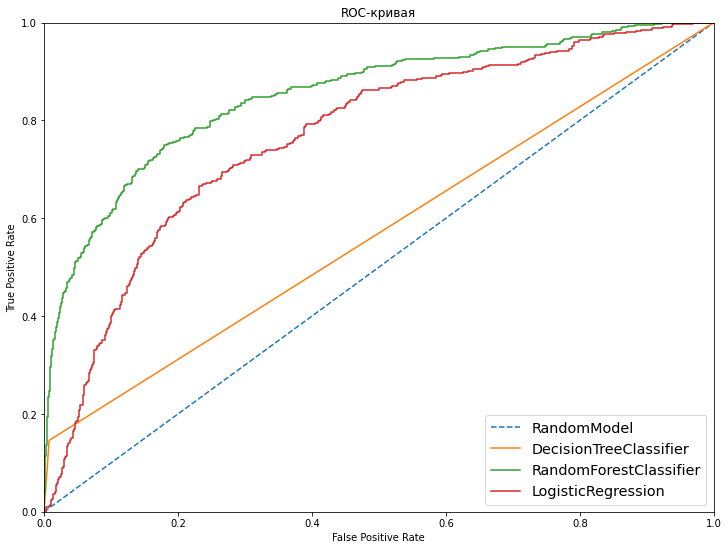

In [38]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

fpr, tpr, thresholds = roc_curve(target_valid, model_dt_balance.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_rf_balance.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='RandomForestClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_lr_balance.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='LogisticRegression')

plt.legend(loc='lower right', fontsize='x-large')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В заключение можно сказать, что при использовании взвешивания классов наибольшие значения метрик F1-меры и AUC-ROC показывает модель случайного леса с F1-мерой равной 0.62 и AUC-ROC равной 0.853. Также неплохие значения метрик имеет модель логистической регрессии с F1-мерой равной 0.519 и AUC-ROC равной 0.766, на последнем месте по данным метрикам идет модель дерева решений. То есть мы увидели, что баланс классов сильно влияет на обучение модели логистической регрессии.   
</div>

### Увеличение выборки

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Следующей техникой борьбы с дисбалансом является увеличение выборки. Применим ее для улучшения качества наших моделей. Начнем с модели дерева решений.
</div>

In [73]:
#изучим соотношение классов в тренировочной выборке

print(target_train.value_counts())

0    4804
1    1196
Name: Exited, dtype: int64


In [55]:
#напишем функцию для увеличения выборки с классами "1", в качестве параметра 'repeat' используем "4" по отношению классов

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat(
        [features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat(
        [target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)             

In [57]:
#зададим гиперпараметры дерева решений

max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

max_features = [int(x) for x in np.linspace(1, 20, num = 10)]

random_state=[12345]

dt_grid = {'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'max_features': max_features,
           'random_state': random_state}

model_dt_upsampled = GridSearchCV(DecisionTreeClassifier(), dt_grid, scoring = 'accuracy')
# обучаем модель
model_dt_upsampled.fit(features_upsampled,target_upsampled)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [12345]},
             scoring='accuracy')

In [58]:
#определяем лучшие гиперпараметры для дерева решений

print('Наивысшая оценка: %s' % model_dt_upsampled.best_score_)
print('Лучшие гиперпараметры: %s' % model_dt_upsampled.best_params_)

Наивысшая оценка: 0.8351084609848876
Лучшие гиперпараметры: {'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 12345}


In [59]:
#получаем предсказания для валидационной выборки

predicted_valid_dt_upsampled = model_dt_upsampled.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_dt_upsampled))
print('Точность:', precision_score(target_valid, predicted_valid_dt_upsampled))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_dt_upsampled))

Полнота: 0.6555023923444976
Точность: 0.45896147403685095
F1-score: 0.5399014778325123


In [60]:
#определим AUC-ROC для модели дерева решений

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_dt_upsampled.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.949
AUC-ROC на валидационной выборке: 0.758


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В данном эксперименте метрики F1-меры и AUC-ROC оказались лучше, чем это было во взвешивании классов. Перейдем к модели случайного леса.
</div>

In [61]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 11)]

max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_state=[12345]

rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'random_state': random_state}

model_rf_upsampled = GridSearchCV(RandomForestClassifier(), rf_grid, scoring = 'accuracy')
# обучаем модель
model_rf_upsampled.fit(features_upsampled,target_upsampled)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 19, 28, 37, 46, 55, 64, 73, 82,
                                          91, 100],
                         'random_state': [12345]},
             scoring='accuracy')

In [62]:
#определяем лучшие гиперпараметры для модели случайного леса

print('Наивысшая оценка: %s' % model_rf_upsampled.best_score_)
print('Лучшие гиперпараметры: %s' % model_rf_upsampled.best_params_)

Наивысшая оценка: 0.8683777713591635
Лучшие гиперпараметры: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64, 'random_state': 12345}


In [63]:
#получаем предсказания для валидационной выборки

predicted_valid_rf_upsampled = model_rf_upsampled.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_rf_upsampled))
print('Точность:', precision_score(target_valid, predicted_valid_rf_upsampled))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_rf_upsampled))

Полнота: 0.6794258373205742
Точность: 0.5737373737373738
F1-score: 0.6221248630887185


In [64]:
#определим AUC-ROC для модели случайного леса

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_rf_upsampled.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.974
AUC-ROC на валидационной выборке: 0.853


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Показатель F1-мера незначительно, но вырос по сравнению с моделью со взвешивания классов. Показатель AUC-ROC остался на прежнем уровне. Перейдем к анализу модели логистической регрессии.
</div>

In [66]:
C = [int(x) for x in np.linspace(start = 1, stop = 10, num = 11)]

max_iter = [int(x) for x in np.linspace(1, 150, num = 11)]

penalty = ['l1', 'l2', 'elasticnet', 'none']

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

random_state = [12345]

lr_grid = {'C': C,
           'max_iter': max_iter,
           'penalty': penalty,
           'solver': solver,
           'random_state': random_state}

model_lr_upsampled = GridSearchCV(LogisticRegression(), lr_grid, scoring = 'accuracy')
# обучаем модель
model_lr_upsampled.fit(features_upsampled,target_upsampled)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_iter': [1, 15, 30, 45, 60, 75, 90, 105, 120, 135,
                                      150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [12345],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [67]:
#определяем лучшие гиперпараметры для логистической регрессии

print('Наивысшая оценка: %s' % model_lr_upsampled.best_score_)
print('Лучшие гиперпараметры: %s' % model_lr_upsampled.best_params_)

Наивысшая оценка: 0.71255867184725
Лучшие гиперпараметры: {'C': 1, 'max_iter': 15, 'penalty': 'none', 'random_state': 12345, 'solver': 'newton-cg'}


In [68]:
#получаем предсказания для валидационной выборки

predicted_valid_lr_upsampled = model_lr_upsampled.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_lr_upsampled))
print('Точность:', precision_score(target_valid, predicted_valid_lr_upsampled))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_lr_upsampled))

Полнота: 0.6818181818181818
Точность: 0.3810160427807487
F1-score: 0.4888507718696398


In [69]:
#определим AUC-ROC для модели случайного леса

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_lr_upsampled.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.780
AUC-ROC на валидационной выборке: 0.764


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Метрика F1-мера логистической регрессии с увеличением выборки оказалась ниже, чем при взвешивании классов. 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Визуально отобразим наши ROC-кривые (кривые ошибок) по каждой модели с учетом увеличения выборки.
</div>

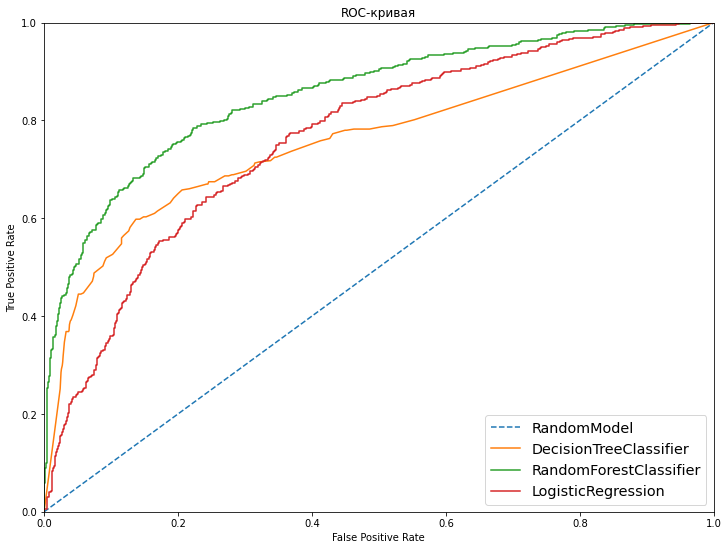

In [70]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

fpr, tpr, thresholds = roc_curve(target_valid, model_dt_upsampled.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_rf_upsampled.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='RandomForestClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_lr_upsampled.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='LogisticRegression')

plt.legend(loc='lower right', fontsize='x-large')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Также как и в эксперименте со взвешиванием классов наибольшие значения метрик F1-меры и AUC-ROC показывает модель случайного леса с F1-мерой равной 0.622 и AUC-ROC равной 0.853. Далее по показателю F1-мера идет модель дерева решений со значением 0.539, затем модель логистической регрессии. По показателю AUC-ROC логистическая регрессия опережает модель девева решений - 0.764 против 0.758.
</div>

### Уменьшение выборки

In [78]:
#напишем функцию для уменьшения выборки с классами "0", в качестве параметра 'fraction' используем "0.25" по отношению классов

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [79]:
#зададим гиперпараметры дерева решений

max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

max_features = [int(x) for x in np.linspace(1, 20, num = 10)]

random_state=[12345]

dt_grid = {'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'max_features': max_features,
           'random_state': random_state}

model_dt_downsampled = GridSearchCV(DecisionTreeClassifier(), dt_grid, scoring = 'accuracy')
# обучаем модель
model_dt_downsampled.fit(features_downsampled,target_downsampled)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [12345]},
             scoring='accuracy')

In [80]:
#определяем лучшие гиперпараметры для дерева решений

print('Наивысшая оценка: %s' % model_dt_downsampled.best_score_)
print('Лучшие гиперпараметры: %s' % model_dt_downsampled.best_params_)

Наивысшая оценка: 0.7584446764091858
Лучшие гиперпараметры: {'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 12345}


In [81]:
#получаем предсказания для валидационной выборки

predicted_valid_dt_downsampled = model_dt_downsampled.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_dt_downsampled))
print('Точность:', precision_score(target_valid, predicted_valid_dt_downsampled))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_dt_downsampled))

Полнота: 0.7440191387559809
Точность: 0.4076015727391874
F1-score: 0.5266723116003387


In [82]:
#определим AUC-ROC для модели дерева решений

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_dt_downsampled.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.864
AUC-ROC на валидационной выборке: 0.806


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В данном эксперименте метрика F1-мера упала по сравнению с экспериментом с увеличением выборки: 0.526 против 0.539, однако метрика AUC-ROC выросла - 0.806 против 0.758. Перейдем к модели случайного леса.
</div>

In [83]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 11)]

max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_state=[12345]

rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'random_state': random_state}

model_rf_downsampled = GridSearchCV(RandomForestClassifier(), rf_grid, scoring = 'accuracy')
# обучаем модель
model_rf_downsampled.fit(features_downsampled,target_downsampled)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 19, 28, 37, 46, 55, 64, 73, 82,
                                          91, 100],
                         'random_state': [12345]},
             scoring='accuracy')

In [84]:
#определяем лучшие гиперпараметры для модели случайного леса

print('Наивысшая оценка: %s' % model_rf_downsampled.best_score_)
print('Лучшие гиперпараметры: %s' % model_rf_downsampled.best_params_)

Наивысшая оценка: 0.7805514961725818
Лучшие гиперпараметры: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 12345}


In [85]:
#получаем предсказания для валидационной выборки

predicted_valid_rf_downsampled = model_rf_downsampled.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_rf_downsampled))
print('Точность:', precision_score(target_valid, predicted_valid_rf_downsampled))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_rf_downsampled))

Полнота: 0.7488038277511961
Точность: 0.48829953198127923
F1-score: 0.591123701605288


In [86]:
#определим AUC-ROC для модели случайного леса

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_rf_downsampled.predict_proba(features_valid)[:, 1])))

AUC-ROC на тренировочной выборке: 0.918
AUC-ROC на валидационной выборке: 0.851


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Модель случайного леса с уменьшением выборки показала результаты хуже, чем эксперимент с увеличением выборки. Метрика F1-мера: 0.591 против 0.622, AUC-ROC: 0.851 против 0.853. Перейдем к модели логистической регрессии.
</div>

In [87]:
C = [int(x) for x in np.linspace(start = 1, stop = 10, num = 11)]

max_iter = [int(x) for x in np.linspace(1, 150, num = 11)]

penalty = ['l1', 'l2', 'elasticnet', 'none']

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

random_state = [12345]

lr_grid = {'C': C,
           'max_iter': max_iter,
           'penalty': penalty,
           'solver': solver,
           'random_state': random_state}

model_lr_downsampled = GridSearchCV(LogisticRegression(), lr_grid, scoring = 'accuracy')
# обучаем модель
model_lr_downsampled.fit(features_downsampled,target_downsampled)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_iter': [1, 15, 30, 45, 60, 75, 90, 105, 120, 135,
                                      150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [12345],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [88]:
#определяем лучшие гиперпараметры для логистической регрессии

print('Наивысшая оценка: %s' % model_lr_downsampled.best_score_)
print('Лучшие гиперпараметры: %s' % model_lr_downsampled.best_params_)

Наивысшая оценка: 0.7108985734168407
Лучшие гиперпараметры: {'C': 4, 'max_iter': 1, 'penalty': 'l2', 'random_state': 12345, 'solver': 'liblinear'}


In [89]:
#получаем предсказания для валидационной выборки

predicted_valid_lr_downsampled = model_lr_downsampled.predict(features_valid)

#определяем значения полноты и точности для валидационной выборки

print('Полнота:', recall_score(target_valid, predicted_valid_lr_downsampled))
print('Точность:', precision_score(target_valid, predicted_valid_lr_downsampled))

#также определяем значение f1 меры

print('F1-score:', f1_score(target_valid, predicted_valid_lr_downsampled))

Полнота: 0.6770334928229665
Точность: 0.38873626373626374
F1-score: 0.493891797556719


In [90]:
#определим AUC-ROC для модели случайного леса

print("AUC-ROC на валидационной выборке: {:.3f}".
format(roc_auc_score(target_valid, model_lr_downsampled.predict_proba(features_valid)[:, 1])))

AUC-ROC на валидационной выборке: 0.766


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Модель логистической регрессии с уменьшением выборки показала себя лучше модели с увеличением выборки, но хуже модели с уменьшением классов.  
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Визуально отобразим наши ROC-кривые (кривые ошибок) по каждой модели с учетом уменьшения выборки.
</div>

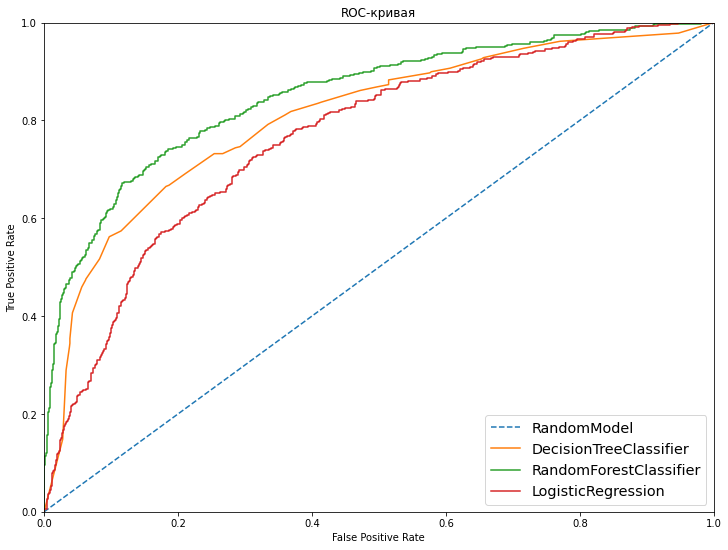

In [91]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

fpr, tpr, thresholds = roc_curve(target_valid, model_dt_downsampled.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_rf_downsampled.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='RandomForestClassifier')

fpr, tpr, thresholds = roc_curve(target_valid, model_lr_downsampled.predict_proba(features_valid)[:, 1])
plt.plot(fpr, tpr, label='LogisticRegression')

plt.legend(loc='lower right', fontsize='x-large')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В очередной раз наибольшие значения метрик F1-меры и AUC-ROC показывает модель случайного леса с F1-мерой равной 0.591 и AUC-ROC равной 0.851. Далее идет модель дерева решений со значением метрики F1-мера 0.526 и AUC-ROC равной 0.806. Затем идет модель логистической регрессии с F1-мерой равной 0.493 и AUC-ROC равной 0.766.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Составим общую таблицу с результатами, чтобы выбрать наилучшую модель для дальнейшего тестирования.
</div>

In [196]:
init = {'f1-мера': [ f1_score(target_valid, predicted_valid_dt),
                f1_score(target_valid, predicted_valid_rf),
                f1_score(target_valid, predicted_valid_lr)         
              ], 
        'auc-roc':
        [roc_auc_score(target_valid, model_dt.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_rf.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_lr.predict_proba(features_valid)[:, 1]), 
        ]}

df_init = pd.DataFrame(init)

In [197]:
balance = {'f1-мера': [ f1_score(target_valid, predicted_valid_dt_balance),
                f1_score(target_valid, predicted_valid_rf_balance),
                f1_score(target_valid, predicted_valid_lr_balance)         
              ], 
        'auc-roc':
        [roc_auc_score(target_valid, model_dt_balance.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_rf_balance.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_lr_balance.predict_proba(features_valid)[:, 1]), 
        ]}

df_balance = pd.DataFrame(balance)

In [198]:
upsampled = {'f1-мера': [f1_score(target_valid, predicted_valid_dt_upsampled),
                f1_score(target_valid, predicted_valid_rf_upsampled),
                f1_score(target_valid, predicted_valid_lr_upsampled)         
              ], 
        'auc-roc':
        [roc_auc_score(target_valid, model_dt_upsampled.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_rf_upsampled.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_lr_upsampled.predict_proba(features_valid)[:, 1]), 
        ]}

df_upsampled = pd.DataFrame(upsampled)

In [199]:
downsampled = {'f1-мера': [ f1_score(target_valid, predicted_valid_dt_downsampled),
                f1_score(target_valid, predicted_valid_rf_downsampled),
                f1_score(target_valid, predicted_valid_lr_downsampled)         
              ], 
        'auc-roc':
        [roc_auc_score(target_valid, model_dt_downsampled.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_rf_downsampled.predict_proba(features_valid)[:, 1]),
         roc_auc_score(target_valid, model_lr_downsampled.predict_proba(features_valid)[:, 1]), 
        ]}

df_downsampled = pd.DataFrame(downsampled)

In [200]:
df_all = pd.concat([df_init, df_balance, df_upsampled, df_downsampled], axis=1, 
                     keys=['без учета дисбаланса', 'взвешивание классов', 'увеличение выборки', 'уменьшение выборки'])

df_all.index = ['Дерево решений', 'Случайный лес', 'Логистическая регрессия']

df_all

без учета дисбаланса         взвешивание классов  \
                                     f1-мера auc-roc             f1-мера   
Дерево решений                         0.528   0.838               0.248   
Случайный лес                          0.580   0.852               0.621   
Логистическая регрессия                0.329   0.759               0.519   

                                увеличение выборки         уменьшение выборки  \
                        auc-roc            f1-мера auc-roc            f1-мера   
Дерево решений            0.569              0.540   0.758              0.527   
Случайный лес             0.853              0.622   0.853              0.591   
Логистическая регрессия   0.766              0.489   0.764              0.494   

                                 
                        auc-roc  
Дерево решений            0.806  
Случайный лес             0.851  
Логистическая регрессия   0.766

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
По результатам, приведенным в таблице можно заметить, что наилучший результат на валидационной выборке по показателям F1-мера и AUC-ROC показывает модель случайного леса, причем максимальный результат был достигнут в эксперименте с увеличением выборки. 
<br>
Модель дерева решений показала лучший результат по показателю F1-мера в эксперименте с увеличением выборки, однако по показателю AUC-ROC наилучший результат был у модели без учета дисбаланса классов.
<br>
Модель логистической регрессии показала лучший результат по показателям F1-мера и AUC-ROC в эксперименте с взвешиванием классов.
<br>
Для тестирования модели примем гиперпараметры, полученные для модели случайного леса в эксперименте с увеличением выборки.     
</div>

## Тестирование модели

In [203]:
#применим нашу лучшую модель для предсказания ответов на тестовой выборке

model_test_rf_upsampled = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2,
                                                 n_estimators=64, random_state=12345) 
model_test_rf_upsampled.fit(features_upsampled, target_upsampled)

#получаем предсказания для тестовой выборки

predicted_test_rf_upsampled = model_test_rf_upsampled.predict(features_test)

#определяем значения полноты и точности для тестовой выборки

print('Полнота:', recall_score(target_test, predicted_test_rf_upsampled))
print('Точность:', precision_score(target_test, predicted_test_rf_upsampled))

#также определяем значение f1 меры

print('F1-score на тестовой выборке:', f1_score(target_test, predicted_test_rf_upsampled))

#определим AUC-ROC для модели случайного леса

print("AUC-ROC на тестовой выборке: {:.3f}".
format(roc_auc_score(target_test, model_test_rf_upsampled.predict_proba(features_test)[:, 1])))

Полнота: 0.6713947990543735
Точность: 0.5590551181102362
F1-score на тестовой выборке: 0.6100966702470462
AUC-ROC на тестовой выборке: 0.854


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В результате тестирования модели случайного леса на тестовой выборке получили достаточно большую величину F1-меры - 0.61, также была получена наибольшая величина AUC-ROC - 0.854. Модель случайного леса достаточно хорошо подходит под задачи бинарной классификации.
</div>